# IBM Capstone Project - The Battle of Neighborhoods

In [279]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

### Introduction

Kanpur and Lucknow are the two most important cities of Uttar Pradesh. Lucknow is the capital city of the Indian state of Uttar Pradesh, whereas is also the second largest city proper and the largest urban agglomeration in Uttar Pradesh. The two cities being in Uttar Pradesh have various similarities and dissimilarities. This study focuses on finding the similarities within neighborhoods of each city. It also tries to understand the tradition and culture of each neighborhood. 

Based on the venues and culture for which neighborhoods are famous for, this project helps business persons can set up their ventures like restaurants, hotels etc.

### Dataset description

The data of neighborhoods is collected through <a href = "https://data.gov.in/resources/all-india-pincode-directory-contact-details-along-latitude-and-longitude" >https://data.gov.in<a>.    

All India Pincode Directory contains all the pin-code list across India with geocodes and other relevant information like Office Name, Office Type, Delivery Status, Division, Region, Circle, Taluk, Districts, States, Telephones, Related Sub office and Related Head office etc. Postal Index Number (PIN) or PIN Code is a 6 digit code of Post Office numbering used by India Post. 
<br>

The first five rows of our dataset is as follows-

In [132]:
#Loading data
data = pd.read_csv('DATASET/all_india_PO_list_without_APS_offices_ver2_lat_long.csv')

#First five rows of data
data.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,Achalapur B.O,504273,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Rechini S.O,Mancherial H.O,NaN,NaN
1,Ada B.O,504293,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Asifabad S.O,Mancherial H.O,NaN,NaN
2,Adegaon B.O,504307,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Boath,Adilabad,TELANGANA,NaN,Echoda S.O,Adilabad H.O,NaN,NaN
3,Adilabad Collectorate S.O,504001,S.O,Non-Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226703,NaN,Adilabad H.O,NaN,NaN
4,Adilabad H.O,504001,H.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226738,NaN,NaN,NaN,NaN


From the above dataset, appropriate rows with Districtname Kanpur Nagar and Lucknow will be fetched for the purpose of analysis. The attributes like officename, pincode, Districtname, will be fetched.

### Methodology

#### Data Preprocessing

It is the process of converting the raw data into the form which aids in the process of analysis.

In [133]:
#Column names for analysis
column = ['officename', 'pincode', 'Districtname']

#Fetching data with column names
df = data[column]

#Rows with Districtname Lucknow and Kanpur Nagar
df = df[((df['Districtname'] == 'Lucknow') | (df['Districtname'] == 'Kanpur Nagar'))]

#First five rows of data
df.head()

,officename,pincode,Districtname
139306,Agriculture College S.O,208002,Kanpur Nagar
139307,Amour B.O,209401,Kanpur Nagar
139308,Anand Nagar S.O (Kanpur Nagar),208011,Kanpur Nagar
139309,Anwarganj S.O,208003,Kanpur Nagar
139310,Aranjhami B.O,209401,Kanpur Nagar


In [134]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in dataset')

There are 469 rows and 3 columns in dataset


In [135]:
#Changing colum names
df.columns = ['Neighborhood', 'Pincode', 'City']

#Resetting index
df.reset_index(inplace = True, drop = True)

#First five rows of dat
df.head()

,Neighborhood,Pincode,City
0,Agriculture College S.O,208002,Kanpur Nagar
1,Amour B.O,209401,Kanpur Nagar
2,Anand Nagar S.O (Kanpur Nagar),208011,Kanpur Nagar
3,Anwarganj S.O,208003,Kanpur Nagar
4,Aranjhami B.O,209401,Kanpur Nagar


In [136]:
#Splitting region
region_list = list(df['Neighborhood'].str.split('S.O|B.O|H.O|G.P.O'))

#Storing new region
for i in range(0, df.shape[0]):
    df.loc[i, 'Neighborhood'] = region_list[i][0]

In [137]:
#First five rows of data
df.head()

,Neighborhood,Pincode,City
0,Agriculture College,208002,Kanpur Nagar
1,Amour,209401,Kanpur Nagar
2,Anand Nagar,208011,Kanpur Nagar
3,Anwarganj,208003,Kanpur Nagar
4,Aranjhami,209401,Kanpur Nagar


In [138]:
#Converting City Kanpur Nagar to Kanpur
for i in range(0, df.shape[0]):
    if(df.loc[i,'City'] == 'Kanpur Nagar'):
        df.loc[i, 'City'] = 'Kanpur'

In [139]:
#Checking for null values
df.isnull().sum()

Neighborhood    0
Pincode         0
City            0
dtype: int64

So there are no null values in the dataset.

In [140]:
#Checking for duplicate rows
df.duplicated().sum()

0

So there is no duplicate data

In [141]:
#Grouping region on pincode
df['Neighborhood'] = df.groupby('Pincode')['Neighborhood'].transform(lambda x : ', '.join(x))

In [142]:
#First five rows of data
df.head()

,Neighborhood,Pincode,City
0,"Agriculture College , Arya Nagar , Employeemen...",208002,Kanpur
1,"Amour , Aranjhami , Baraigarh , Bausar , Behta...",209401,Kanpur
2,"Anand Nagar , Kidwai Nagar , RBI Colony , Yash...",208011,Kanpur
3,"Anwarganj , Chauki Jarib",208003,Kanpur
4,"Amour , Aranjhami , Baraigarh , Bausar , Behta...",209401,Kanpur


In [143]:
#Checking and removing duplicate rows
print(f'There are {df.duplicated().sum()} duplicated rows in our dataset')

There are 392 duplicated rows in our dataset


In [144]:
#Removing duplicate rows
df = df.drop_duplicates()

In [145]:
#Resetting index
df.reset_index(inplace = True, drop = True)

In [146]:
#Importing Nominatim to add Lattitudes and Longitudes
from geopy.geocoders import Nominatim

#Instantiating Nominatim object with agent
geolocator = Nominatim(user_agent="foursquare_agent")

In [147]:
#Adding Latitude and Longitude as columns 
df['Latitude'] = 0.0
df['Longitude'] = 0.0

In [148]:
#First five rows of data
df.head()

,Neighborhood,Pincode,City,Latitude,Longitude
0,"Agriculture College , Arya Nagar , Employeemen...",208002,Kanpur,0.0,0.0
1,"Amour , Aranjhami , Baraigarh , Bausar , Behta...",209401,Kanpur,0.0,0.0
2,"Anand Nagar , Kidwai Nagar , RBI Colony , Yash...",208011,Kanpur,0.0,0.0
3,"Anwarganj , Chauki Jarib",208003,Kanpur,0.0,0.0
4,"Armapore Estate , Armapore",208009,Kanpur,0.0,0.0


In [155]:
#Iterating through each row
for i in range(50, df.shape[0]):
    j = 0
    region_list = df['Neighborhood'][i].split(',')
    while(j < len(region_list)):
        address = region_list[j].strip()
        location = geolocator.geocode(address + ' ' + df.loc[i,'City'])
        if location is not None:
            df.loc[i, 'Latitude'] = location.latitude
            df.loc[i, 'Longitude'] = longitude = location.longitude
            break
        else:
            j = j + 1

In [156]:
#First five rows of data
df.head()

,Neighborhood,Pincode,City,Latitude,Longitude
0,"Agriculture College , Arya Nagar , Employeemen...",208002,Kanpur,26.487283,80.309072
1,"Amour , Aranjhami , Baraigarh , Bausar , Behta...",209401,Kanpur,20.427233,85.164390
2,"Anand Nagar , Kidwai Nagar , RBI Colony , Yash...",208011,Kanpur,26.471757,80.288659
3,"Anwarganj , Chauki Jarib",208003,Kanpur,26.455843,80.328103
4,"Armapore Estate , Armapore",208009,Kanpur,0.000000,0.000000


In [157]:
#Looking for rows with Latitude and Longitude as zero
df = df[((df['Latitude'] != 0.0) & (df['Longitude'] != 0.0))]

#Resetting index
df.reset_index(inplace = True, drop = True)

In [158]:
#No. of rows and columns in data
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in dataset')

There are 55 rows and 5 columns in dataset


In [159]:
#Saving dataset for future reference
df.to_csv('DATASET/new_dataset.csv', index = False)

In [160]:
df = pd.read_csv('DATASET/new_dataset.csv')

In [161]:
#Storing coordinates of neighborhoods of lucknow
df_lucknow = df[df['City'] == 'Lucknow']

#Storing coordinates of neighborhoods of kanpur
df_kanpur = df[df['City'] == 'Kanpur']

Text(0.5, 1.0, 'Distribution of Longitude (Kanpur)')

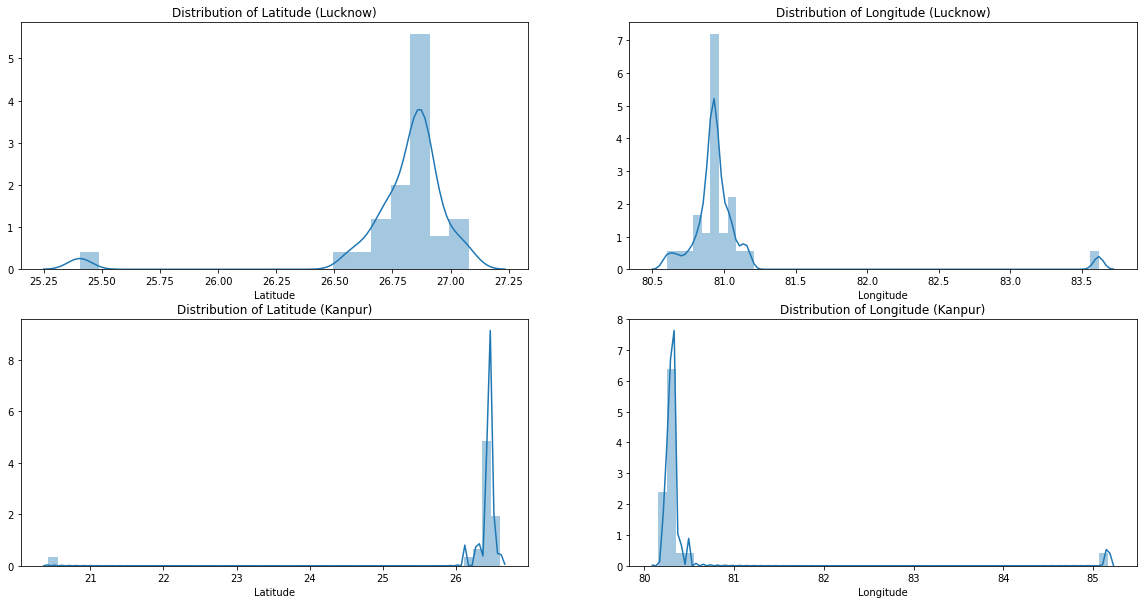

In [162]:
#Looking for outliers

#Adding subplots
fig, axs = plt.subplots(2,2, figsize = (20, 10))

sns.distplot(df_lucknow['Latitude'], ax = axs[0][0])
axs[0][0].set_title('Distribution of Latitude (Lucknow)')

sns.distplot(df_lucknow['Longitude'], ax = axs[0][1])
axs[0][1].set_title('Distribution of Longitude (Lucknow)')

sns.distplot(df_kanpur['Latitude'], ax = axs[1][0])
axs[1][0].set_title('Distribution of Latitude (Kanpur)')

sns.distplot(df_kanpur['Longitude'], ax = axs[1][1])
axs[1][1].set_title('Distribution of Longitude (Kanpur)')

In [163]:
#Removing outliers

df_lucknow = df_lucknow[df_lucknow['Longitude'] <= 81.5]
df_kanpur = df_kanpur[(df_kanpur['Latitude'] >= 25) & (df_kanpur['Latitude'] <= 27)]
df_kanpur = df_kanpur[(df_kanpur['Longitude'] >= 80) & (df_kanpur['Latitude'] <= 81)]


In [183]:
#Fetching coordinates of Lucknow

address = 'Lucknow, Uttar Pradesh, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
llatitude = location.latitude
llongitude = location.longitude
print('The geograpical coordinate of Lucknow are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lucknow are 26.4609135, 80.3217588.


In [184]:
# create map of Lucknow using latitude and longitude values
map_lucknow = folium.Map(location=[llatitude, llongitude], zoom_start=10)

# add markers to map
for lat, lng, region in zip(df_lucknow['Latitude'], df_lucknow['Longitude'], df_lucknow['Neighborhood']):
    label = '{}'.format(region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lucknow)  
    
map_lucknow

In [185]:
#Fetching coordinates of Kanpur

address = 'Kanpur, Uttar Pradesh, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
klatitude = location.latitude
klongitude = location.longitude
print('The geograpical coordinate of Lucknow are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lucknow are 26.4609135, 80.3217588.


In [186]:
# create map of Lucknow using latitude and longitude values
map_kanpur = folium.Map(location=[klatitude, klongitude], zoom_start=10)

# add markers to map
for lat, lng, region in zip(df_kanpur['Latitude'], df_kanpur['Longitude'], df_kanpur['Neighborhood']):
    label = '{}'.format(region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kanpur)  
    
map_kanpur

In [168]:
#Foursquar credentials
CLIENT_ID = 'WKFKU1OCOHGDFCZYXDFGFXUQMTTYAZYJN3QZPRIQJEHYF1KW'
CLIENT_SECRET = 'OK0WKR3NPPIETAQ523IM1HPFJLZWOGDLFZTYRU0KBQMMIHEX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WKFKU1OCOHGDFCZYXDFGFXUQMTTYAZYJN3QZPRIQJEHYF1KW
CLIENT_SECRET:OK0WKR3NPPIETAQ523IM1HPFJLZWOGDLFZTYRU0KBQMMIHEX


In [169]:
#Function to get nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [93]:
#Venus in Lucknow 
lucknow_venues = getNearbyVenues(names=df_lucknow['Neighborhood'],
                                   latitudes=df_lucknow['Latitude'],
                                   longitudes=df_lucknow['Longitude']
                                  )

In [94]:
#Printing venues in neighborhoods of lucknow
print(lucknow_venues.shape)
lucknow_venues.head()

(171, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",26.837382,80.909823,Naka Hindola,26.837176,80.920334,Market
1,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",26.837382,80.909823,Lucknow Charbagh Railway Station | लखनऊ चारबाग...,26.831374,80.923666,Train Station
2,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",26.837382,80.909823,Lucknow Junction Railway Station | लखनऊ जंक्शन...,26.831779,80.918341,Train Station
3,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",26.837382,80.909823,Cumsum,26.830523,80.923898,Food Court
4,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",26.837382,80.909823,The Eureka Walk,26.833619,80.928570,Shopping Mall


In [95]:
#Count of no. of venues returned for each neighborhood in lucknow
lucknow_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"A N L Colony , Aishbagh , Arya Nagar , Blunt Square , Charbagh , Gurdwara , Mill Road , Pandariba , R A College , Rajendranagar",5,5,5,5,5,5
"A P Sabha , Canal Colony , CPMG Campus , Darul Safa , Gokhley Marg , H C Bench , Jawahar Bhawan , Lalbagh , Secretariat , Lucknow",23,23,23,23,23,23
"Adarsh Nagar , Ain , Alambagh , Anandnagar , Barha , Benti , Bhatgaon , C&w Work Shop , Distt. Jail , Locomotive W Shop , Pawanpuri , Rahim Nagar Padiana , Singar Nagar , Sujanpura",5,5,5,5,5,5
"Ain , Aurawan , Bani , Banthra , Benti , Bhatgaon , Garhi Chunauti , Harauni , Neewan , Rahimnagar Padiyana , Tirwa",1,1,1,1,1,1
"Akariakalan , Amaniganj , Arjunpur , Ateswa , Bahargaon , Bibipur , Indara , Itaunja , Jamkhanwa , Khantari , Kumharawan. , Mahigawan , Mahona , Narosa , Paharpur , Sarai Damu , Singhamau , Usarana",1,1,1,1,1,1
"Alamnagar , Avas Vikas Colony , R G C Mill , Rajajipuram",6,6,6,6,6,6
"Aliganj Extension , Aliganj , Chandganj",6,6,6,6,6,6
"Amberganj , Chaupatiyan , Hasnain Market , Husainabad , Lucknow Chowk , Mansoor Nagar , Medical College , Nadan Mahal , Naubasta , Raja Bazar , Saadatganj , Sarai Mali Khan , Sarfraj , T. Tib , Thakurganj , Victoriaganj , Yahiaganj",7,7,7,7,7,7
"Amethia Salempur , Bahroo , Baragaon , Barawan Kalan , Dona , Gohramau , Kakori , Khalispur , Khushalganj , Malha , Rehman Khera",1,1,1,1,1,1


In [96]:
print('There are {} uniques categories.'.format(len(lucknow_venues['Venue Category'].unique())))

There are 47 uniques categories.


In [98]:
#Dropping venues with venue category as neighborhood
lucknow_venues = lucknow_venues[lucknow_venues['Venue Category'] != 'Neighborhood']

#Resetting index
lucknow_venues.reset_index(inplace = True, drop = True)

In [103]:
#Storing neighborhoods with venue count < 4
df_l = (lucknow_venues.groupby('Neighborhood').count() < 4)

In [104]:
#Storing index of neighborhoods with count > 4
df_l_index = df_l[df_l['Venue Category'] == False].index

In [105]:
#Creating new lucknow_venues
df_l_list = df_l_index.tolist()

for i in range(0, lucknow_venues.shape[0]):
    if lucknow_venues.loc[i,'Neighborhood'] not in df_l_list:
        lucknow_venues.drop(i, inplace = True)

In [107]:
#Resetting index
lucknow_venues.reset_index(inplace = True, drop = True)

In [108]:
# one hot encoding
lucknow_onehot = pd.get_dummies(lucknow_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lucknow_onehot['Neighborhood'] = lucknow_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lucknow_onehot.columns[-1]] + list(lucknow_onehot.columns[:-1])
lucknow_onehot = lucknow_onehot[fixed_columns]

lucknow_onehot.head()

,Neighborhood,ATM,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bank,Breakfast Spot,Building,Bus Station,...,Pharmacy,Pizza Place,Platform,Plaza,Restaurant,Sandwich Place,Shopping Mall,Snack Place,Tea Room,Train Station
0,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [109]:
print(f'There are {lucknow_onehot.shape[0]} rows and {lucknow_onehot.shape[1]} columns')

There are 162 rows and 46 columns


In [120]:
#Grouping on Neighborhood and taking mean
lucknow_grouped = lucknow_onehot.groupby('Neighborhood').mean().reset_index()

In [121]:
#Shape of lucknow_grouped dataframe
print(f'Lucknow Grouped Dataframe have {lucknow_grouped.shape[0]} rows and {lucknow_grouped.shape[1]} columns')

Lucknow Grouped Dataframe have 15 rows and 46 columns


In [210]:
#Function to return topmost venue
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [227]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lucknow_grouped['Neighborhood']

for ind in np.arange(lucknow_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lucknow_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",Train Station,Shopping Mall,Market,Food Court
1,"A P Sabha , Canal Colony , CPMG Campus , Darul...",Indian Restaurant,Fast Food Restaurant,Bakery,Hookah Bar
2,"Adarsh Nagar , Ain , Alambagh , Anandnagar , B...",Food Court,Fast Food Restaurant,Pizza Place,Bus Station
3,"Alamnagar , Avas Vikas Colony , R G C Mill , R...",Flea Market,Asian Restaurant,Platform,Pharmacy
4,"Aliganj Extension , Aliganj , Chandganj",Dessert Shop,Bank,Breakfast Spot,Pizza Place


### Modelling for Lucknow City

In [228]:
#Importing KMeans
from sklearn.cluster import KMeans

In [229]:
# set number of clusters
kclusters = 5

lucknow_grouped_clustering = lucknow_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lucknow_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 2, 3, 1, 1, 4, 3])

In [230]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lucknow_merged = df_lucknow

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lucknow_merged = lucknow_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

lucknow_merged.head() # check the last columns!

,Neighborhood,Pincode,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
25,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",226004,Lucknow,26.837382,80.909823,0.0,Train Station,Shopping Mall,Market,Food Court
26,"A P Sabha , Canal Colony , CPMG Campus , Darul...",226001,Lucknow,26.865492,80.939564,1.0,Indian Restaurant,Fast Food Restaurant,Bakery,Hookah Bar
27,"Adampur Janubi , Bahrauli , Chatauni , Karora ...",226303,Lucknow,26.618479,81.141071,NaN,NaN,NaN,NaN,NaN
28,"Adarsh Nagar , Ain , Alambagh , Anandnagar , B...",226005,Lucknow,26.813952,80.907797,1.0,Food Court,Fast Food Restaurant,Pizza Place,Bus Station
29,"Ain , Aurawan , Bani , Banthra , Benti , Bhatg...",226401,Lucknow,26.706731,80.748026,NaN,NaN,NaN,NaN,NaN


In [231]:
#Dropping NANs
lucknow_merged.dropna(inplace = True)

In [232]:
lucknow_merged['Cluster Labels'] = lucknow_merged['Cluster Labels'].astype('int64')

In [233]:
# create map
map_clusters = folium.Map(location=[llatitude, llongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lucknow_merged['Latitude'], lucknow_merged['Longitude'], lucknow_merged['Neighborhood'], lucknow_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining clusters of Lucknow Neighborhoods

#### Neighborhoods Of Cluster 1

In [293]:
lucknow_merged.loc[lucknow_merged['Cluster Labels'] == 0, lucknow_merged.columns[[0] + list(range(5, lucknow_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
25,"A N L Colony , Aishbagh , Arya Nagar , Blunt S...",0,Train Station,Shopping Mall,Market,Food Court


#### Neighborhoods of Cluster 2

In [294]:
lucknow_merged.loc[lucknow_merged['Cluster Labels'] == 1, lucknow_merged.columns[[0] + list(range(5, lucknow_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
26,"A P Sabha , Canal Colony , CPMG Campus , Darul...",1,Indian Restaurant,Fast Food Restaurant,Bakery,Hookah Bar
28,"Adarsh Nagar , Ain , Alambagh , Anandnagar , B...",1,Food Court,Fast Food Restaurant,Pizza Place,Bus Station
31,"Alamnagar , Avas Vikas Colony , R G C Mill , R...",1,Flea Market,Asian Restaurant,Platform,Pharmacy
38,"Aminabad Park , Balrampur Hospital , Ganesh Ga...",1,Indian Restaurant,Hotel,Café,Fast Food Restaurant
39,"Amraigaon , Anaura Kalan , Chinhat , Goila , J...",1,Indian Restaurant,Fast Food Restaurant,Clothing Store,Train Station
50,"Gomtinagar , Gomtinagar Vistar , Laulai , Male...",1,Fast Food Restaurant,Café,Multiplex,Shopping Mall
53,"Nadwa , New Hyderabad , R P Line",1,Indian Restaurant,Fast Food Restaurant,Hookah Bar,Ice Cream Shop


It looks like all these places are similar in the context that they have Restaurants and Hotels.

#### Neighborhoods of Cluster 3

In [298]:
lucknow_merged.loc[lucknow_merged['Cluster Labels'] == 2, lucknow_merged.columns[[0] + list(range(5, lucknow_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
32,"Aliganj Extension , Aliganj , Chandganj",2,Dessert Shop,Bank,Breakfast Spot,Pizza Place
46,"D M Road , Daliganj , Diguria , Ghaila , Lonik...",2,History Museum,Fast Food Restaurant,Bakery,Coffee Shop
51,"H E School , M N Colony , Mahanagar , Sant Mar...",2,Bakery,Gym,Restaurant,Plaza


#### Neighborhoods of Cluster 4

In [299]:
lucknow_merged.loc[lucknow_merged['Cluster Labels'] == 3, lucknow_merged.columns[[0] + list(range(5, lucknow_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
35,"Amberganj , Chaupatiyan , Hasnain Market , Hus...",3,ATM,Pizza Place,Fast Food Restaurant,Indian Restaurant
44,"Batha Sabauli , Jankipuram , Madiyaon",3,ATM,Bank,Business Service,Chinese Restaurant
52,"Kalyanpur , Vikas Nagar",3,ATM,IT Services,Indian Restaurant,Building


#### Neighborhoods of Cluster 5 

In [300]:
lucknow_merged.loc[lucknow_merged['Cluster Labels'] == 4, lucknow_merged.columns[[0] + list(range(5, lucknow_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
40,"Antagarhi , Atari , Badiyan , Bazargaron , Bee...",4,Hotel,Train Station,Fast Food Restaurant,Chinese Restaurant


In [259]:
#Venus in Kanpur
kanpur_venues = getNearbyVenues(names=df_kanpur['Neighborhood'],
                                   latitudes=df_kanpur['Latitude'],
                                   longitudes=df_kanpur['Longitude']
                                  )

In [260]:
#Printing venues in neighborhoods of kanpur
print(kanpur_venues.shape)
kanpur_venues.head()

(136, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Agriculture College , Arya Nagar , Employeemen...",26.487283,80.309072,Upper Crust,26.482225,80.320857,Bakery
1,"Agriculture College , Arya Nagar , Employeemen...",26.487283,80.309072,"Aromas, Arya Nagar",26.482953,80.318024,Fast Food Restaurant
2,"Agriculture College , Arya Nagar , Employeemen...",26.487283,80.309072,Hotel Royal Cliff,26.479289,80.314855,Hotel
3,"Agriculture College , Arya Nagar , Employeemen...",26.487283,80.309072,Rave @ Moti,26.481579,80.300102,Shopping Mall
4,"Agriculture College , Arya Nagar , Employeemen...",26.487283,80.309072,Big Cinemas,26.492084,80.327682,Multiplex


In [261]:
print('There are {} uniques categories.'.format(len(kanpur_venues['Venue Category'].unique())))

There are 40 uniques categories.


In [262]:
#Count of no. of venues returned for each neighborhood in lucknow
kanpur_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Agriculture College , Arya Nagar , Employeement Exchange , Gsvm Medical College , Hbti , Motijheel , N C Line , Nawabganj , Purana Kanpur , Swarup Nagar",15,15,15,15,15,15
"Anand Nagar , Kidwai Nagar , RBI Colony , Yashoda Nagar",4,4,4,4,4,4
"Anwarganj , Chauki Jarib",4,4,4,4,4,4
"Avas Vikas Yojna No. 3 , Bairi , Kalyanpur , Keshav Puram , Kheora , Nsi",4,4,4,4,4,4
"B N Shukla & Sons , Birhana Raod , Colonelganj , Cotton Mill , Dhankutti , Elgin Mills , Fahimabad , Farrashkhana , Gwaltoli , Hatia , K M Street , Kanpur Court , Kanpur , Kanpur West , Naveen Market , Nayaganj , Oe Factory , Philkhana",16,16,16,16,16,16
"Baikuthpur , Bithoor , Itra , Mandhana , Naramau , Pachor , Pem , Tatya Ganj , Tikra",1,1,1,1,1,1
"Barra , Barra Vishwa Bank Sector-A",5,5,5,5,5,5
"Bhairampur , Bhauti Pratappur , Bhimsen , Chakarpur , Mardanpur , Senpara Paschim",2,2,2,2,2,2
"Binour , Bisayakpur , Fatehpur Roshnai , Jugrajpur , Parsauli , Raipur Kukhat , Rania , Sachendi",6,6,6,6,6,6


In [263]:
#Storing neighborhoods with venue count < 4
df_k = (kanpur_venues.groupby('Neighborhood').count() < 4)

#Storing index of neighborhoods with count > 4
df_k_index = df_k[df_k['Venue Category'] == False].index

In [265]:
#Creating new kanpur_venues
df_k_list = df_k_index.tolist()

for i in range(0, kanpur_venues.shape[0]):
    if kanpur_venues.loc[i,'Neighborhood'] not in df_k_list:
        kanpur_venues.drop(i, inplace = True)

In [268]:
#Resetting index
kanpur_venues.reset_index(inplace = True, drop = True)

In [269]:
# one hot encoding
kanpur_onehot = pd.get_dummies(kanpur_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kanpur_onehot['Neighborhood'] = kanpur_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kanpur_onehot.columns[-1]] + list(kanpur_onehot.columns[:-1])
kanpur_onehot = kanpur_onehot[fixed_columns]

kanpur_onehot.head()

,Neighborhood,ATM,Airport,Bakery,Bowling Alley,Breakfast Spot,Bus Station,Business Service,Café,Chinese Restaurant,...,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Restaurant,Shopping Mall,Snack Place,Tea Room,Train Station
0,"Agriculture College , Arya Nagar , Employeemen...",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Agriculture College , Arya Nagar , Employeemen...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Agriculture College , Arya Nagar , Employeemen...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Agriculture College , Arya Nagar , Employeemen...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,"Agriculture College , Arya Nagar , Employeemen...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
print(f'There are {kanpur_onehot.shape[0]} rows and {kanpur_onehot.shape[1]} columns')

There are 133 rows and 40 columns


In [271]:
#Grouping on Neighborhood and taking mean
kanpur_grouped = kanpur_onehot.groupby('Neighborhood').mean().reset_index()

In [272]:
#Shape of lucknow_grouped dataframe
print(f'Kanpur Grouped Dataframe have {kanpur_grouped.shape[0]} rows and {kanpur_grouped.shape[1]} columns')

Kanpur Grouped Dataframe have 19 rows and 40 columns


In [273]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kanpur_grouped['Neighborhood']

for ind in np.arange(lucknow_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kanpur_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,"Agriculture College , Arya Nagar , Employeemen...",Shopping Mall,Bakery,Hotel,Multiplex
1,"Anand Nagar , Kidwai Nagar , RBI Colony , Yash...",Multiplex,Shopping Mall,Pizza Place,Café
2,"Anwarganj , Chauki Jarib",Train Station,Shopping Mall,Bus Station,Coffee Shop
3,"Avas Vikas Yojna No. 3 , Bairi , Kalyanpur , K...",Food Court,Clothing Store,Snack Place,Hostel
4,"B N Shukla & Sons , Birhana Raod , Colonelganj...",Fast Food Restaurant,Hotel,Multiplex,Furniture / Home Store


### Modelling for Kanpur City

In [274]:
# set number of clusters
kclusters = 5

kanpur_grouped_clustering = kanpur_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kanpur_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 4, 3, 2, 0, 0, 1, 2, 2])

In [276]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kanpur_merged = df_kanpur

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kanpur_merged = kanpur_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kanpur_merged.head() # check the last columns!

,Neighborhood,Pincode,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,"Agriculture College , Arya Nagar , Employeemen...",208002,Kanpur,26.487283,80.309072,2.0,Shopping Mall,Bakery,Hotel,Multiplex
2,"Anand Nagar , Kidwai Nagar , RBI Colony , Yash...",208011,Kanpur,26.471757,80.288659,2.0,Multiplex,Shopping Mall,Pizza Place,Café
3,"Anwarganj , Chauki Jarib",208003,Kanpur,26.455843,80.328103,4.0,Train Station,Shopping Mall,Bus Station,Coffee Shop
4,"Avas Vikas Yojna No. 3 , Bairi , Kalyanpur , K...",208017,Kanpur,26.503707,80.252397,3.0,Food Court,Clothing Store,Snack Place,Hostel
5,"B N Shukla & Sons , Birhana Raod , Colonelganj...",208001,Kanpur,26.484390,80.329128,2.0,Fast Food Restaurant,Hotel,Multiplex,Furniture / Home Store


In [277]:
#Dropping NANs
kanpur_merged.dropna(inplace = True)

kanpur_merged['Cluster Labels'] = kanpur_merged['Cluster Labels'].astype('int64')

In [278]:
# create map
map_clusters = folium.Map(location=[klatitude, klongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kanpur_merged['Latitude'], kanpur_merged['Longitude'], kanpur_merged['Neighborhood'], kanpur_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining clusters of Kanpur Neighborhoods

#### Neighborhoods of Cluster 1

In [301]:
kanpur_merged.loc[kanpur_merged['Cluster Labels'] == 0, kanpur_merged.columns[[0] + list(range(5, kanpur_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
7,"Barra , Barra Vishwa Bank Sector-A",0,ATM,Fast Food Restaurant,Business Service,Paper / Office Supplies Store
11,"Binour , Bisayakpur , Fatehpur Roshnai , Jugra...",0,ATM,Pizza Place,Lighting Store,Market


#### Neighborhoods of Cluster 2

In [303]:
kanpur_merged.loc[kanpur_merged['Cluster Labels'] == 1, kanpur_merged.columns[[0] + list(range(5, kanpur_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
13,"COD , Dmsrde , Shyam Nagar",1,Fast Food Restaurant,Shopping Mall,Park,Coffee Shop
17,"Juhi Colony , Nirala Nagar",1,Fast Food Restaurant,Shopping Mall,Park,Coffee Shop
18,"Kasigaon , Kathongar , N H Road , Naubasta , P...",1,Fast Food Restaurant,IT Services,Dessert Shop,Train Station
19,"Munshipurwa , T P Nagar",1,Fast Food Restaurant,Shopping Mall,Park,Coffee Shop


#### Neighborhoods of Cluster 3

In [304]:
kanpur_merged.loc[kanpur_merged['Cluster Labels'] == 2, kanpur_merged.columns[[0] + list(range(5, kanpur_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,"Agriculture College , Arya Nagar , Employeemen...",2,Shopping Mall,Bakery,Hotel,Multiplex
2,"Anand Nagar , Kidwai Nagar , RBI Colony , Yash...",2,Multiplex,Shopping Mall,Pizza Place,Café
5,"B N Shukla & Sons , Birhana Raod , Colonelganj...",2,Fast Food Restaurant,Hotel,Multiplex,Furniture / Home Store
12,"Cambridge Road , Gandhi Grame , Hal Colony , H...",2,ATM,Airport,Shopping Mall,Pharmacy
14,"D O Oil Mill , Jawahar Nagar , Kaushalpuri , R...",2,Fast Food Restaurant,Bakery,Gym,Coffee Shop
15,"Govind Nagar , Govind Nagar West",2,Multiplex,Shopping Mall,Indian Restaurant,Coffee Shop
16,Iit,2,Performing Arts Venue,ATM,Hostel,Hotel


#### Neighborhoods of Cluster 4

In [305]:
kanpur_merged.loc[kanpur_merged['Cluster Labels'] == 3, kanpur_merged.columns[[0] + list(range(5, kanpur_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
4,"Avas Vikas Yojna No. 3 , Bairi , Kalyanpur , K...",3,Food Court,Clothing Store,Snack Place,Hostel


#### Neighborhoods of Cluster 5

In [306]:
kanpur_merged.loc[kanpur_merged['Cluster Labels'] == 4, kanpur_merged.columns[[0] + list(range(5, kanpur_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
3,"Anwarganj , Chauki Jarib",4,Train Station,Shopping Mall,Bus Station,Coffee Shop
